In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os , shutil

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Prepare the Data

In [3]:
train = 'train'

In [4]:
val = 'val'
test = 'test'

In [5]:
gen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                         width_shift_range= 0.2,
                         height_shift_range= 0.2,
                         zoom_range = 0.2, 
                         shear_range= 0.2,
                         fill_mode = 'nearest')
                        

In [6]:
train_gen = gen.flow_from_directory(train , target_size= (200,200) , class_mode='binary' , batch_size=20  )

Found 244 images belonging to 2 classes.


In [7]:
val_gen = gen.flow_from_directory(val , target_size=(200,200) , class_mode="binary" , batch_size=20)

Found 20 images belonging to 2 classes.


In [8]:
#Making MOdel 
model1 = models.Sequential()

In [9]:
counter =0
for data_batch, labels_batch in train_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
4
4


In [10]:
data_batch[0]
labels_batch[0]

0.0

Making a Model 

In [11]:

model = model1


In [12]:
model.add(layers.Conv2D(32,(3,3), activation='relu' , input_shape = (200,200,3)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 128)       7

Compile Model 

In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4) ,
              loss="binary_crossentropy" , 
              metrics= ['acc'])

In [16]:
histore = model.fit(train_gen,steps_per_epoch=70,epochs=10, validation_data=val_gen, validation_steps=30)

                      
                      
                      



Epoch 1/10
70/70 [==============================] - 38s 496ms/step - loss: 0.6852 - acc: 0.5943 - val_loss: 0.6616 - val_acc: 0.6500


Prepare test Data

In [17]:
test_gen = gen.flow_from_directory(test , target_size=(200,200) , class_mode='binary' , batch_size= 20)
                                   

Found 20 images belonging to 2 classes.


In [18]:
counter =0
for data_b, labels_b in test_gen:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
0.0
1
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)
1.0
4
4


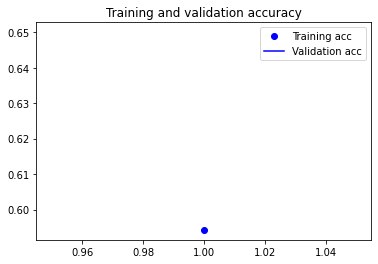

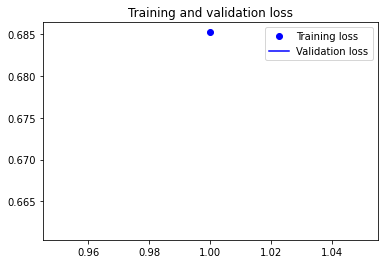

In [19]:
%matplotlib inline  
import matplotlib.pyplot as plt
history = histore.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Test a single Image of Corona and non corona x-ray 

In [20]:
d = 'test/normal/IM-0131-0001.jpeg' # non corona image
f = "test/corona/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg"  # corona image

In [21]:
t = image.load_img(d ,target_size=(200,200))
t= image.img_to_array(t)
t = np.expand_dims(t , axis=0)
t/= 255.

tf = image.load_img(f ,target_size=(200,200))
tf= image.img_to_array(tf)
tf = np.expand_dims(tf , axis=0)
tf/= 255.

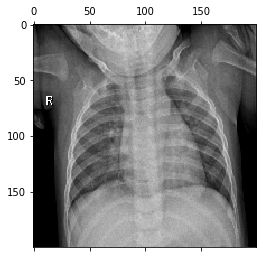

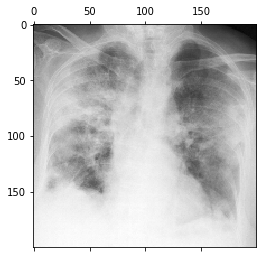

In [22]:
plt.matshow(t[0]) # non corona image
plt.matshow(tf[0]) # corona image

In [23]:
b = model.predict(t[[0]])
a = model.predict(tf[[0]])

In [24]:
if a<.50:
  print("corona")


corona


In [26]:
if b>.50 :
  print('good health')

Making a list as per prediction on test data

In [27]:
# TEST the MOdel
predict = model.predict(test_gen)
predict = list(predict)

In [28]:
prediction =[]


In [29]:
for i in predict:
  if i>.50:
    prediction.append("Healthy")
  else:
    prediction.append('CORONA VIRUS')

In [30]:
prediction,predict

(['CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'Healthy',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS',
  'CORONA VIRUS'],
 [array([0.45242894], dtype=float32),
  array([0.45078194], dtype=float32),
  array([0.4557307], dtype=float32),
  array([0.49282962], dtype=float32),
  array([0.47824803], dtype=float32),
  array([0.4428128], dtype=float32),
  array([0.48779815], dtype=float32),
  array([0.44886675], dtype=float32),
  array([0.4552404], dtype=float32),
  array([0.50958675], dtype=float32),
  array([0.45840824], dtype=float32),
  array([0.44722417], dtype=float32),
  array([0.54350716], dtype=float32),
  array([0.48405582], dtype=float32),
  array([0.4902033], dtype=float32),
  array([0.4846216], dtype=float32),
  array([0.48108044], dtype=float32),
  array(

In [31]:
model.save('Covide19 .h5')